   G1  G2  G3  age  studytime  failures  absences
0   5   6   6   18          2         0         6
1   5   5   6   17          2         0         4
2   7   8  10   15          2         3        10
3  15  14  15   15          3         0         2
4   6  10  10   16          2         0         4
Coefficient:  [ 0.1595154   0.95952641 -0.13727545 -0.21622751 -0.20632295  0.03828279]
Intercept:  1.0067558607373162
18.894002757546225 [19 18 15  2  0  2] 18
12.106273535814378 [11 12 16  2  0 12] 11
13.84410728023598 [14 14 17  3  0  4] 14
9.723829459385582 [10 10 17  1  0  2] 10
15.469596090075884 [16 15 18  2  0 11] 15
6.218704459087542 [ 7  7 15  2  1  2] 7
5.108947001094031 [ 6  6 18  2  1 13] 8
12.182138352888037 [13 12 16  1  0  0] 12
7.6213944010390815 [ 9  8 18  2  1 16] 7
12.479255717937212 [14 12 19  2  0 20] 13
9.2625631315615 [ 9 10 18  3  0  9] 9
15.53687731591386 [16 15 15  2  0  2] 15
10.615486571695865 [10 11 15  4  0 10] 11
-1.3645461016728602 [ 5  0 17  1  3  0] 0
5.539

/var/folders/g2/h64125750z74clw5blr8n3yw0000gn/T/ipykernel_4746/2813308395.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(data.drop([predict], 1))


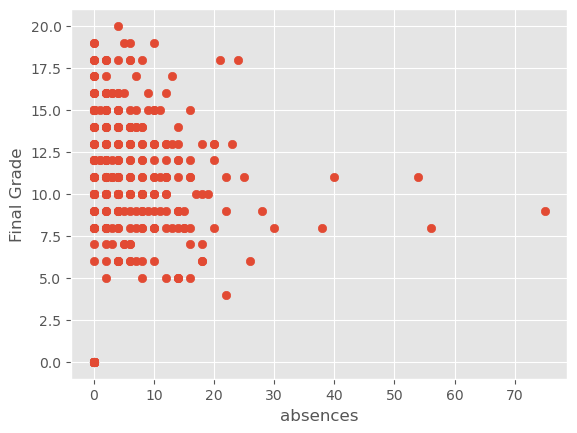

In [3]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.utils import shuffle
from sklearn import linear_model, preprocessing
from matplotlib import style

data = pd.read_csv("/Users/mohamedabdinasir/Downloads/student/student-mat.csv", sep=";")

data = data[["G1", "G2", "G3", "age", "studytime", "failures", "absences"]]
print(data.head())

predict = "G3"

x = np.array(data.drop([predict], 1))
y = np.array(data[predict])
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)

# best = 0

# for i in range(30):
#     model = linear_model.LinearRegression()
#     model.fit(x_train, y_train)
#     acc = model.score(x_test, y_test) 
#     print("accuracy: ", acc)

#     if acc > best:
#         best = acc
#         with open("studentmodel.pickle", "wb") as f:
#             pickle.dump(model, f)
#         break

pickle_in = open("studentmodel.pickle", "rb")
model = pickle.load(pickle_in)

print("Coefficient: ", model.coef_)
print("Intercept: ", model.intercept_)

predictions = model.predict(x_test)

for x in range(len(predictions)):
    print(predictions[x], x_test[x], y_test[x])

p = "absences"
style.use("ggplot")
style = plt.scatter(data[p], data["G3"])
plt.xlabel(p)
plt.ylabel("Final Grade")
plt.show()

